In [1]:
import sys
sys.path.append('/Users/gilmandelbaum/GitHub/mouse_bandit/data_preprocessing_code')
sys.path.append('/Users/gilmandelbaum/GitHub/mouse_bandit')
import support_functions as sf
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import scipy as sp
import bandit_preprocessing as bp
import sklearn.linear_model
from sklearn import discriminant_analysis
from sklearn import cross_validation
from sklearn import tree as Tree
import sklearn.tree
from sklearn.cross_validation import train_test_split as tts
%matplotlib inline 

## Load in data

In [2]:
data1 = pd.read_csv('/Users/gilmandelbaum/GitHub/ac209a_project/data/80_20_processed_data/dumble_8020_df.csv',index_col=0)
data2 = pd.read_csv('/Users/gilmandelbaum/GitHub/ac209a_project/data/80_20_processed_data/harry_8020_df.csv',index_col=0)

In [55]:
data1.head(5)

,Previous_10_Left_Choice,Previous_10_Right_Choice,Previous_10_Left_Reward,Previous_10_Right_Reward,Streak,5_Port,5_Reward,5_ITI,5_trialDuration,4_Port,...,2_Reward,2_ITI,2_trialDuration,1_Port,1_Reward,1_ITI,1_trialDuration,0_ITI,0_trialDuration,Decision
0,10.0,0.0,8.0,0.0,-1.0,1.0,0.0,3.286,0.407,1.0,...,1.0,2.234,0.325,1.0,0.0,2.133,0.482,1.411,0.435,1.0
1,10.0,0.0,7.0,0.0,-2.0,1.0,1.0,2.405,0.463,1.0,...,0.0,2.133,0.482,1.0,0.0,1.411,0.435,2.169,0.395,0.0
2,9.0,1.0,6.0,0.0,-3.0,1.0,1.0,2.379,0.367,1.0,...,0.0,1.411,0.435,0.0,0.0,2.169,0.395,3.838,0.469,0.0
3,8.0,2.0,5.0,0.0,-4.0,1.0,1.0,2.234,0.325,1.0,...,0.0,2.169,0.395,0.0,0.0,3.838,0.469,1.846,0.378,1.0
4,8.0,2.0,5.0,0.0,1.0,1.0,0.0,2.133,0.482,1.0,...,0.0,3.838,0.469,1.0,1.0,1.846,0.378,1.527,0.416,1.0


In [56]:
data1.shape

(5862, 28)

In [4]:
data2.head(5)

,Previous_10_Left_Choice,Previous_10_Right_Choice,Previous_10_Left_Reward,Previous_10_Right_Reward,Streak,5_Port,5_Reward,5_ITI,5_trialDuration,4_Port,...,2_Reward,2_ITI,2_trialDuration,1_Port,1_Reward,1_ITI,1_trialDuration,0_ITI,0_trialDuration,Decision
0,10.0,0.0,8.0,0.0,3.0,1.0,1.0,1.512,0.242,1.0,...,1.0,2.103,0.414,1.0,1.0,3.806,0.390,2.621,0.340,1.0
1,10.0,0.0,7.0,0.0,-1.0,1.0,0.0,2.048,0.414,1.0,...,1.0,3.806,0.390,1.0,0.0,2.621,0.340,1.543,0.361,1.0
2,10.0,0.0,7.0,0.0,1.0,1.0,1.0,1.414,0.479,1.0,...,0.0,2.621,0.340,1.0,1.0,1.543,0.361,2.882,0.328,1.0
3,10.0,0.0,7.0,0.0,2.0,1.0,1.0,2.103,0.414,1.0,...,1.0,1.543,0.361,1.0,1.0,2.882,0.328,2.728,0.452,1.0
4,10.0,0.0,7.0,0.0,-1.0,1.0,1.0,3.806,0.390,1.0,...,1.0,2.882,0.328,1.0,0.0,2.728,0.452,1.275,0.447,1.0


In [57]:
data2.shape

(5464, 28)

In [51]:
#making a combined data set: 
frames = [data1, data2]
data3 = pd.concat(frames)

In [53]:
data3.shape

(11326, 28)

In [58]:
#extract features and decisions from mouse 1: 
x1 = data1.iloc[:,:-1].values
y1 = data1.iloc[:,-1].values

#extract features and decisions from mouse 2:
x2 = data2.iloc[:,:-1].values
y2 = data2.iloc[:,-1].values

#extract features and decisions from both together 3: 
x3 = data3.iloc[:,:-1].values
y3 = data3.iloc[:,-1].values

# Change 'y' so that 1 corresponds to a switch, and 0 corresponds to no switch

In [6]:
#for animal 1:

y1_diff = np.diff(y1)
x1 = x1[:-1,:]
y1 = np.abs(y1_diff.copy())

print(x1.shape)
print(y1_diff.shape)

(5861, 27)
(5861,)


In [7]:
#for animal 2:

y2_diff = np.diff(y2)
x2 = x2[:-1,:]
y2 = np.abs(y2_diff.copy())

print(x2.shape)
print(y2_diff.shape)

(5463, 27)
(5463,)


In [59]:
#for combined:

y3_diff = np.diff(y3)
x3 = x3[:-1,:]
y3 = np.abs(y3_diff.copy())

print(x3.shape)
print(y3_diff.shape)

(11325, 27)
(11325,)


In [8]:
#split into training and testing animal 1
n_trials1 = x1.shape[0]
shuf_inds1 = np.random.permutation(n_trials1)
split_ind1 = int(n_trials1*0.7)

x1_train = x1[shuf_inds1[:split_ind1],:]
y1_train = y1[shuf_inds1[:split_ind1]]

x1_test = x1[shuf_inds1[split_ind1:],:]
y1_test = y1[shuf_inds1[split_ind1:]]

In [9]:
#split into training and testing animal 2
n_trials2 = x2.shape[0]
shuf_inds2 = np.random.permutation(n_trials2)
split_ind2 = int(n_trials2*0.7)

x2_train = x2[shuf_inds2[:split_ind2],:]
y2_train = y2[shuf_inds2[:split_ind2]]

x2_test = x2[shuf_inds2[split_ind2:],:]
y2_test = y2[shuf_inds2[split_ind2:]]

In [60]:
#split into training and testing for both animals combined: 
n_trials3 = x3.shape[0]
shuf_inds3 = np.random.permutation(n_trials3)
split_ind3 = int(n_trials3*0.7)

x3_train = x3[shuf_inds3[:split_ind3],:]
y3_train = y3[shuf_inds3[:split_ind3]]

x3_test = x3[shuf_inds3[split_ind3:],:]
y3_test = y3[shuf_inds3[split_ind3:]]

In [10]:
print "for animal 1:"
print ""
print('# train trials for animal 1: %.0f | # switches: %.0f --> %.01f percent' % (y1_train.shape[0],np.sum(y1_train),np.sum(y1_train)*100.0/y1_train.shape[0]))
print('# test trials for animal 1: %.0f | # switches: %.0f --> %.01f percent' % (y1_test.shape[0],np.sum(y1_test),np.sum(y1_test)*100.0/y1_test.shape[0]))

for animal 1:

# train trials for animal 1: 4102 | # switches: 364 --> 8.9 percent
# test trials for animal 1: 1759 | # switches: 157 --> 8.9 percent


In [11]:
print "for animal 2:"
print ""
print('# train trials for animal 2: %.0f | # switches: %.0f --> %.01f percent' % (y2_train.shape[0],np.sum(y2_train),np.sum(y2_train)*100.0/y2_train.shape[0]))
print('# test trials for animal 2: %.0f | # switches: %.0f --> %.01f percent' % (y2_test.shape[0],np.sum(y2_test),np.sum(y2_test)*100.0/y2_test.shape[0]))

for animal 2:

# train trials for animal 2: 3824 | # switches: 264 --> 6.9 percent
# test trials for animal 2: 1639 | # switches: 111 --> 6.8 percent


In [61]:
print "for both animals combined:"
print ""
print('# train trials for both animals: %.0f | # switches: %.0f --> %.01f percent' % (y3_train.shape[0],np.sum(y3_train),np.sum(y3_train)*100.0/y3_train.shape[0]))
print('# test trials for both animals: %.0f | # switches: %.0f --> %.01f percent' % (y3_test.shape[0],np.sum(y3_test),np.sum(y3_test)*100.0/y3_test.shape[0]))

for both animals combined:

# train trials for both animals: 7927 | # switches: 610 --> 7.7 percent
# test trials for both animals: 3398 | # switches: 287 --> 8.4 percent


# Basic Logistic Regression without tuning

In [65]:
logreg = sklearn.linear_model.LogisticRegression()
logreg.fit(x1_train,y1_train)
y1_predict = logreg.predict(x1_test)
acc1,F11=sf.score_F1_and_confuse(y1_predict,y1_test,confusion=False)

          Predicted NO  Predicted YES
True NO         1600.0            2.0
True YES         157.0            0.0

F1: 0.000

Score: 0.91


In [66]:
logreg.fit(x2_train,y2_train)
y2_predict = logreg.predict(x2_test)
acc2,F12=sf.score_F1_and_confuse(y2_predict,y2_test,confusion=False)

          Predicted NO  Predicted YES
True NO         1526.0            2.0
True YES         111.0            0.0

F1: 0.000

Score: 0.93


In [64]:
logreg.fit(x3_train,y3_train)
y3_predict = logreg.predict(x3_test)
acc3,F13=sf.score_F1_and_confuse(y3_predict,y3_test,confusion=False)

          Predicted NO  Predicted YES
True NO         3108.0            3.0
True YES         287.0            0.0

F1: 0.000

Score: 0.91


# LDA and tune priors for both animals and combining them

In [67]:
'''
LDA
'''
P = np.arange(0,1,0.01)

acc_cv1 = []
acc_cv2 = []
acc_cv3 = []
for i,p in enumerate(P):
    
    prior = np.array([1.0-p,p])
    lda1 = discriminant_analysis.LinearDiscriminantAnalysis(priors = prior)
    lda2 = discriminant_analysis.LinearDiscriminantAnalysis(priors = prior)
    lda3 = discriminant_analysis.LinearDiscriminantAnalysis(priors = prior)
    
    kf1 = cross_validation.KFold(x1_train.shape[0],n_folds=3)
    cum_acc_pos1 = 0
    cum_acc_neg1 = 0
    
    kf2 = cross_validation.KFold(x2_train.shape[0],n_folds=3)
    cum_acc_pos2 = 0
    cum_acc_neg2 = 0
    
    kf3 = cross_validation.KFold(x3_train.shape[0],n_folds=3)
    cum_acc_pos3 = 0
    cum_acc_neg3 = 0
    
    for train_index1,test_index1 in kf1:
        x1_train_cv = x1_train[train_index1,:]
        y1_train_cv = y1_train[train_index1]
        x1_test_cv = x1_train[test_index1,:]
        y1_test_cv = y1_train[test_index1]
        
    for train_index2,test_index2 in kf2:
        x2_train_cv = x2_train[train_index2,:]
        y2_train_cv = y2_train[train_index2]
        x2_test_cv = x2_train[test_index2,:]
        y2_test_cv = y2_train[test_index2]

    
    for train_index3,test_index3 in kf3:
        x3_train_cv = x3_train[train_index3,:]
        y3_train_cv = y3_train[train_index3]
        x3_test_cv = x3_train[test_index3,:]
        y3_test_cv = y3_train[test_index3]
        
        lda1.fit(x1_train_cv,y1_train_cv)
        y1_predict = lda1.predict(x1_test_cv)
        
        lda2.fit(x2_train_cv,y2_train_cv)
        y2_predict = lda2.predict(x2_test_cv)
        
        lda3.fit(x3_train_cv,y3_train_cv)
        y3_predict = lda3.predict(x3_test_cv)
        
        acc_pos1,acc_neg1,F11 = sf.score_both_and_confuse(y1_predict,y1_test_cv,confusion=False,disp=False)
        
        acc_pos2,acc_neg2,F12 = sf.score_both_and_confuse(y2_predict,y2_test_cv,confusion=False,disp=False)
        
        acc_pos3,acc_neg3,F13 = sf.score_both_and_confuse(y3_predict,y3_test_cv,confusion=False,disp=False)

        
        cum_acc_pos1 += acc_pos1
        cum_acc_neg1 += acc_neg1
        
        cum_acc_pos2 += acc_pos2
        cum_acc_neg2 += acc_neg2
        
        cum_acc_pos3 += acc_pos3
        cum_acc_neg3 += acc_neg3
        
    acc_cv1.append([cum_acc_pos1 / 3.0,cum_acc_neg1 / 3.0])
    acc_cv2.append([cum_acc_pos2 / 3.0,cum_acc_neg2 / 3.0])
    acc_cv3.append([cum_acc_pos3 / 3.0,cum_acc_neg3 / 3.0])
    
    
acc_cv1 = np.asarray(acc_cv1)
acc_cv2 = np.asarray(acc_cv2)
acc_cv3 = np.asarray(acc_cv3)

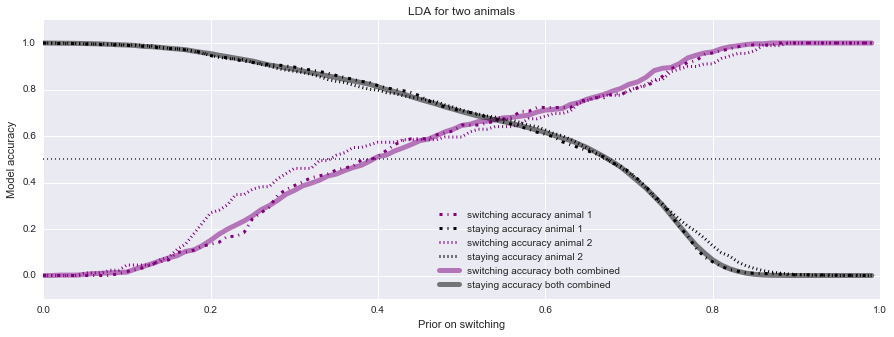

In [77]:
'''
plot
'''

plt.figure(figsize=(15,5))

plt.plot(P,acc_cv1[:,0],linestyle='dashdot', color='purple',label='switching accuracy animal 1',linewidth = 3)
plt.plot(P,acc_cv1[:,1],linestyle='dashdot', color='black',label='staying accuracy animal 1',linewidth = 3)

plt.plot(P,acc_cv2[:,0],linestyle='dotted', color='purple',label='switching accuracy animal 2',linewidth = 3)
plt.plot(P,acc_cv2[:,1],linestyle='dotted', color='black',label='staying accuracy animal 2',linewidth = 3)

plt.plot(P,acc_cv3[:,0],color='purple', alpha = 0.5, label='switching accuracy both combined', linewidth = 5)
plt.plot(P,acc_cv3[:,1],color='black', alpha = 0.5, label='staying accuracy both combined', linewidth = 5)


plt.hlines(y=0.5,xmin=0,xmax=1.0,color='black',alpha=0.7,linestyle='dotted')

plt.legend(loc='lower right',bbox_to_anchor=[0.7,0])
plt.xlim(0,1)
plt.ylim(-0.1,1.1)
plt.xlabel('Prior on switching')
plt.ylabel('Model accuracy')
plt.title('LDA for two animals')

Cool - this is way better with more data. With 1 session of data, the two lines crossed just below 50%. Now we are doing well above chance with both animals! not much difference here if looking at animals together or seperate.

## LDA with tuned prior parameters for the two animals

In [78]:
print "for animal number 1:"
print ""
best_lda1 = discriminant_analysis.LinearDiscriminantAnalysis(priors=[0.4,0.6])
best_lda1.fit(x1_train,y1_train)
y1_predict = best_lda1.predict(x1_test)
acc_pos1,acc_neg1,F11=sf.score_both_and_confuse(y1_predict,y1_test,disp=True,confusion=False)

for animal number 1:

          Predicted NO  Predicted YES
True NO         1010.0          592.0
True YES          45.0          112.0

F1: 0.260

Accuracy on class 0: 0.63
Accuracy on class 1: 0.71



In [79]:
print "for animal number 2:"
print ""
best_lda2 = discriminant_analysis.LinearDiscriminantAnalysis(priors=[0.4,0.6])
best_lda2.fit(x2_train,y2_train)
y2_predict = best_lda2.predict(x2_test)
acc_pos2,acc_neg2,F12=sf.score_both_and_confuse(y2_predict,y2_test,disp=True,confusion=False)

for animal number 2:

          Predicted NO  Predicted YES
True NO          951.0          577.0
True YES          31.0           80.0

F1: 0.208

Accuracy on class 0: 0.62
Accuracy on class 1: 0.72



In [80]:
print "for both animals:"
print ""
best_lda3 = discriminant_analysis.LinearDiscriminantAnalysis(priors=[0.4,0.6])
best_lda3.fit(x3_train,y3_train)
y3_predict = best_lda3.predict(x3_test)
acc_pos3,acc_neg3,F13=sf.score_both_and_confuse(y3_predict,y3_test,disp=True,confusion=False)

for both animals:

          Predicted NO  Predicted YES
True NO         1907.0         1204.0
True YES          81.0          206.0

F1: 0.243

Accuracy on class 0: 0.61
Accuracy on class 1: 0.72



(-2, 2)

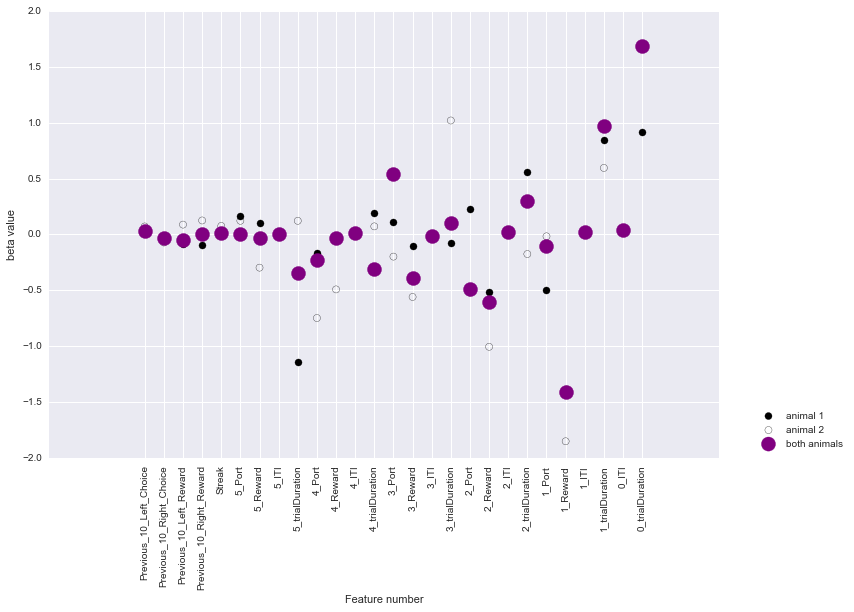

In [88]:
#plot the coef: 

coefs1 = best_lda1.coef_
coefs2 = best_lda2.coef_
coefs3 = best_lda3.coef_

plt.figure(figsize=(12,8))
plt.scatter(np.arange(coefs1[0].shape[0]),coefs1[0],color='black',s=50,label='animal 1')
plt.scatter(np.arange(coefs2[0].shape[0]),coefs2[0],color='black',facecolors='none',s=50, label='animal 2')
plt.scatter(np.arange(coefs3[0].shape[0]),coefs3[0],color='purple',s=200, label='both animals')

plt.xticks(np.arange(coefs1[0].shape[0]),data1.columns.values,rotation='vertical')
plt.ylabel('beta value')
plt.xlabel('Feature number')
plt.legend(loc='lower right',bbox_to_anchor=[1.2,0])
plt.ylim(-2,2)

Interesting - the trial durations are the biggest betas here. Let's look at that ...

# Distributions of trial duration for the current trial being predicted
## This was the most weighted coefficient in the LDA model above

In [39]:
#stay_0triald1 = data1.loc[y1==0,'0_trialDuration']
#switch_0triald1 = data1.loc[y1==1,'0_trialDuration']

#stay_0triald2 = data2.loc[y2==0,'0_trialDuration']
#switch_0triald2 = data2.loc[y2==1,'0_trialDuration']

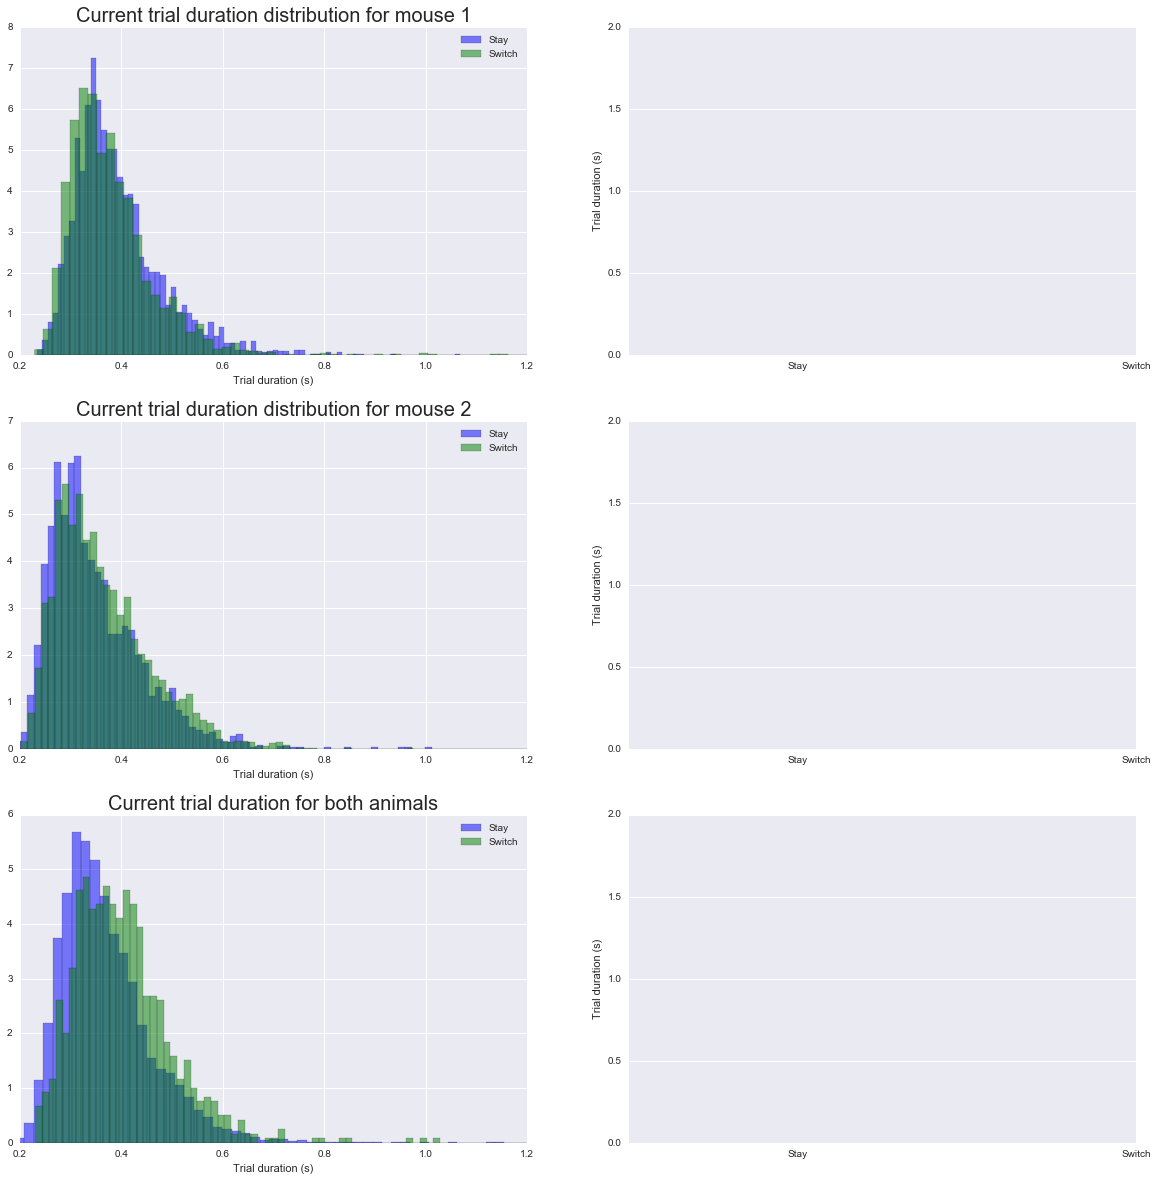

In [91]:
plt.figure(figsize=(20,20))

plt.subplot(321) 
plt.hist(data1.loc[y1==0,'0_trialDuration'].values,bins=100,color='blue',alpha=0.5,label='Stay',normed=True)
plt.hist(data1.loc[y1==1,'0_trialDuration'].values,bins=100,color='green',alpha=0.5,label='Switch',normed=True)
plt.title('Current trial duration distribution for mouse 1', size = 20)
plt.xlim(0.2,1.2)
plt.legend(loc='upper right')
plt.xlabel('Trial duration (s)')

plt.subplot(322)
sns.boxplot(data1 = [data1.loc[y1==0,'0_trialDuration'].values,data1.loc[y1==1,'0_trialDuration'].values],palette = ['blue','green'],saturation=0.5)
plt.xticks([0,1],['Stay','Switch'])
plt.ylim(0,2)
plt.ylabel('Trial duration (s)')


plt.subplot(323)
plt.hist(data2.loc[y2==0,'0_trialDuration'].values,bins=100,color='blue',alpha=0.5,label='Stay',normed=True)
plt.hist(data2.loc[y2==1,'0_trialDuration'].values,bins=100,color='green',alpha=0.5,label='Switch',normed=True)
plt.title('Current trial duration distribution for mouse 2', size = 20)
plt.xlim(0.2,1.2)
plt.legend(loc='upper right')
plt.xlabel('Trial duration (s)')

plt.subplot(324)
sns.boxplot(data2 = [data2.loc[y2==0,'0_trialDuration'].values,data2.loc[y2==1,'0_trialDuration'].values],palette = ['blue','green'],saturation=0.5)
plt.xticks([0,1],['Stay','Switch'])
plt.ylim(0,2)
plt.ylabel('Trial duration (s)')

plt.subplot(325)
plt.hist(data3.loc[y3==0,'0_trialDuration'].values,bins=100,color='blue',alpha=0.5,label='Stay',normed=True)
plt.hist(data3.loc[y3==1,'0_trialDuration'].values,bins=100,color='green',alpha=0.5,label='Switch',normed=True)
plt.title('Current trial duration for both animals', size = 20)
plt.xlim(0.2,1.2)
plt.legend(loc='upper right')
plt.xlabel('Trial duration (s)')

plt.subplot(326)
sns.boxplot(data3 = [data3.loc[y3==0,'0_trialDuration'].values,data3.loc[y3==1,'0_trialDuration'].values],palette = ['blue','green'],saturation=0.5)
plt.xticks([0,1],['Stay','Switch'])
plt.ylim(0,2)
plt.ylabel('Trial duration (s)')

In [ ]:
dataStay = data.loc[y==0,'0_trialDuration'].values
dataStay.shape[0]

It's not as striking as I thought it would be. But there is a difference. What about the other high betas?

In [112]:
range (1,22)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21]

## Plotting some more distributions for the most important features in the LDA model above:

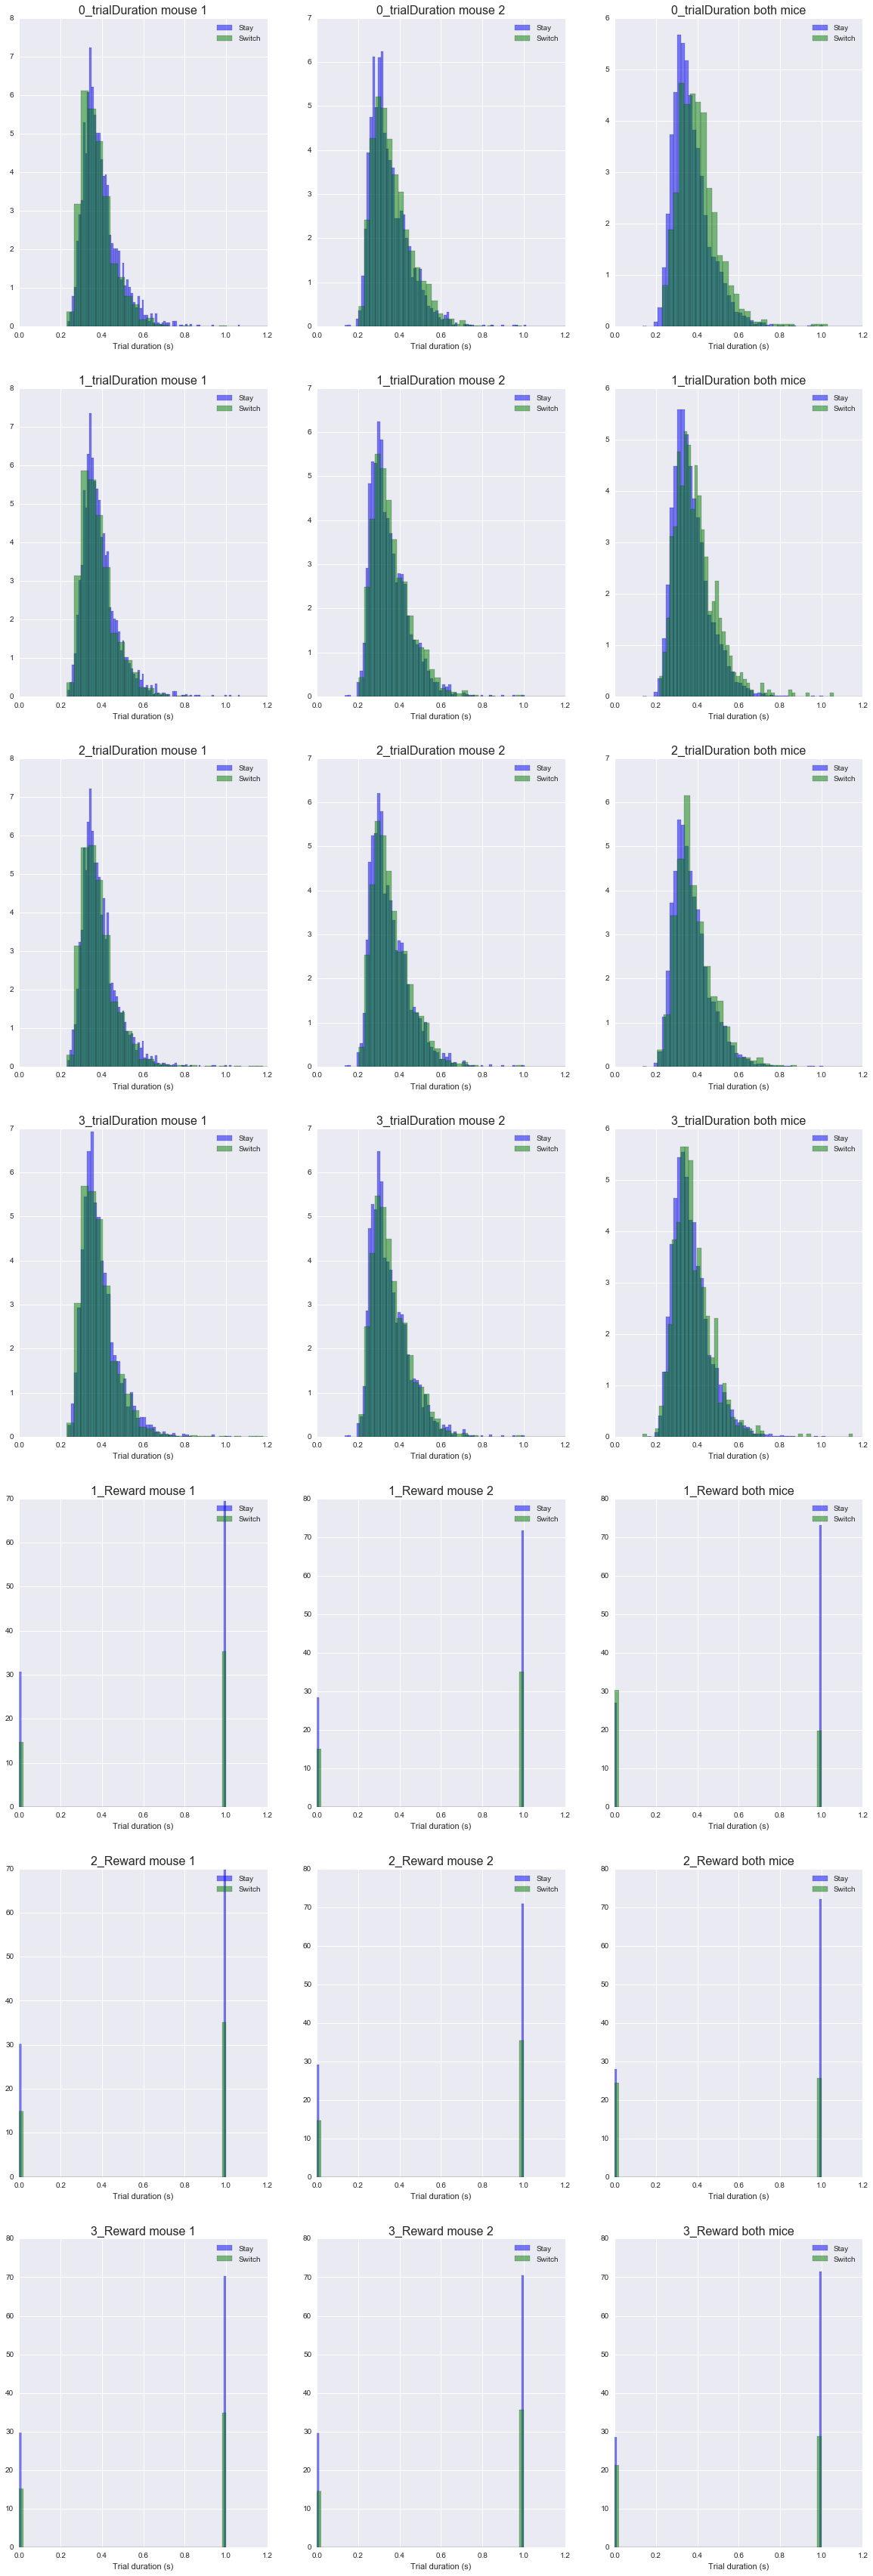

In [119]:
features = ['0_trialDuration','1_trialDuration','2_trialDuration','3_trialDuration','1_Reward','2_Reward','3_Reward']
p = ['mouse 1', 'mouse 2', 'both mice']
dataList = [data1, data2, data3]
yList = [y1,y2,y3]
s = 1

plt.figure(figsize=(20,60))

for f in (features):

    for q in range (0,3):
    
            plt.subplot(7,3,s)
            data = dataList[q]
            y = yList[q]
            plt.hist(data.loc[y==0,f].values,bins=100,color='blue',alpha=0.5,label='Stay',normed=True)
            plt.hist(data.loc[y==1,f].values,bins=50,color='green',alpha=0.5,label='Switch',normed=True)
            plt.title(f +" " + p[q], size = 16)
            plt.xlim(0,1.2)
            plt.legend(loc='upper right')
            plt.xlabel('Trial duration (s)')
            s = s+1


In [ ]:
#plt.subplot(13,2,s[i]+1)
        #sns.boxplot(dataList[q] = [dataList[q].loc[yList==0,'0_trialDuration'].values,dataList[q].loc[yList==1,'0_trialDuration'].values],palette = ['blue','green'],saturation=0.5)
        #plt.xticks([0,1],['Stay','Switch'])
        #plt.ylim(0,2)
        #plt.ylabel('Trial duration (s)')

## Decision Tree

In [ ]:
tree = Tree.DecisionTreeClassifier()
tree.fit(x_train,y_train)
y_predict = tree.predict(x_test)
acc_pos,acc_neg,F1 = sf.score_both_and_confuse(y_predict,y_test,confusion=False)

## Decision Tree: tune depth & class weights

In [ ]:
D = np.array([2,5,10,20,50,100])
P = np.arange(0,1,0.01)

acc_cv = []

for i,d in enumerate(D):
    
    for p in P:
        prior = np.array([1.0-p,p])
        tree = Tree.DecisionTreeClassifier(max_depth=d,class_weight={0:prior[0],1:prior[1]})

        kf = cross_validation.KFold(x_train.shape[0],n_folds=3)
        cum_acc_pos = 0
        cum_acc_neg = 0

        for train_index,test_index in kf:
            x_train_cv = x_train[train_index,:]
            y_train_cv = y_train[train_index]
            x_test_cv = x_train[test_index,:]
            y_test_cv = y_train[test_index]

            tree.fit(x_train_cv,y_train_cv)
            y_predict = tree.predict(x_test_cv)

            acc_pos,acc_neg,F1 = sf.score_both_and_confuse(y_predict,y_test_cv,confusion=False,disp=False)

            cum_acc_pos += acc_pos
            cum_acc_neg += acc_neg

        acc_cv.append([cum_acc_pos / 3.0,cum_acc_neg / 3.0])

acc_cv = np.asarray(acc_cv)

In [ ]:
inds = np.arange(0,600,100)
plt.figure(figsize=(15,10))

for i,ind in enumerate(inds):
    
    plt.subplot(2,3,i+1)
    plt.plot(P,acc_cv[ind:ind+100,0],color='purple',label='switching accuracy')
    plt.plot(P,acc_cv[ind:ind+100,1],color='black',label='staying accuracy')
    plt.hlines(y=0.5,xmin=0,xmax=1,color='black',alpha=0.7,linestyle='dotted')
    plt.legend(loc='lower right',bbox_to_anchor=[0.5,0.3])
    plt.ylabel('Model accuracy')
    plt.xlabel('Switching class weight')
    plt.title('Decision Tree \nDepth: %.0f' % D[i])
plt.tight_layout()